<a href="https://colab.research.google.com/github/lalchan123/Neural-Network-Code_and_ML_algorithm/blob/main/Moving_Square_Video_Prediction_CNN_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
from random import random
from random import randint
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, TimeDistributed

**Instance Generator**

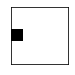

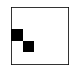

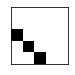

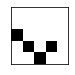

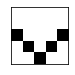

In [2]:
# generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    # define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    # choose the row index for the next step
    step = randint(lower, upper)
    # copy the prior frame
    frame = last_frame.copy()
    # add the new step
    frame[step, column] = 1
    return frame, step

# generate a sequence of frames of a dot moving across an image
def build_frames(size):
    frames = list()
    # create the first frame
    frame = np.zeros((size,size))
    step = randint(0, size-1)
    # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    # create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

# generate sequence of frames
size = 5
frames, right = build_frames(size)
# plot all frames
plt.figure()
for i in range(size):
    # create a gray scale subplot for each frame
    plt.subplot(1, size, i+1) 
    plt.imshow(frames[i], cmap='Greys') 
    # turn of the scale to make it clearer 
    ax = plt.gca() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    # show the plot
    plt.show()

In [5]:
# generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
  # resize as [samples, timesteps, width, height, channels]
    X = np.array(X).reshape(n_patterns, size, size, size, 1)
    y = np.array(y).reshape(n_patterns, 1)
    return X, y

**CNN Model**

In [6]:
size = 50

model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation='relu'), 
                          input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                240600    
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fitting model in loop inorder to avoid kernel breakdown due to memory 
for i in range(10):
    print("Loop : ",i)
    X, y = generate_examples(size, 500)
    model.fit(X, y, batch_size=32, epochs=1)

Loop :  0
16/16 [==============================] - 33s 721ms/step - loss: 0.6830 - accuracy: 0.5627
Loop :  1
16/16 [==============================] - 11s 714ms/step - loss: 0.3296 - accuracy: 0.8840
Loop :  2
16/16 [==============================] - 12s 775ms/step - loss: 0.3960 - accuracy: 0.8940
Loop :  3
16/16 [==============================] - 11s 714ms/step - loss: 0.1264 - accuracy: 0.9840
Loop :  4
16/16 [==============================] - 12s 750ms/step - loss: 0.1085 - accuracy: 0.9800
Loop :  5
16/16 [==============================] - 11s 713ms/step - loss: 0.0516 - accuracy: 0.9920
Loop :  6
16/16 [==============================] - 11s 714ms/step - loss: 0.0477 - accuracy: 0.9900
Loop :  7
16/16 [==============================] - 11s 707ms/step - loss: 0.0229 - accuracy: 0.9980
Loop :  8
16/16 [==============================] - 11s 712ms/step - loss: 0.0279 - accuracy: 0.9960
Loop :  9
16/16 [==============================] - 11s 710ms/step - loss: 0.0590 - accuracy: 0.9860


**evaluate model**

In [8]:
# evaluate model
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0) 
print('loss: %f, acc: %f' % (loss, acc*100))


loss: 0.037867, acc: 99.000001


**prediction on new data**

In [9]:
# prediction on new data
for i in range(10):
    print('Example : ',i+1)
    X, y = generate_examples(size, 1)
    yhat = model.predict_classes(X, verbose=0)
    expected = "Right" if y[0]==1 else "Left"
    predicted = "Right" if yhat[0]==1 else "Left" 
    print('Expected: %s, Predicted: %s' % (expected, predicted))

Example :  1


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Expected: Left, Predicted: Left
Example :  2
Expected: Left, Predicted: Left
Example :  3
Expected: Left, Predicted: Left
Example :  4
Expected: Right, Predicted: Right
Example :  5
Expected: Left, Predicted: Left
Example :  6
Expected: Right, Predicted: Right
Example :  7
Expected: Right, Predicted: Right
Example :  8
Expected: Right, Predicted: Right
Example :  9
Expected: Right, Predicted: Right
Example :  10
Expected: Left, Predicted: Left
